In [2]:
import xarray as xr
import xesmf as xe
from xmip.preprocessing import combined_preprocessing
import PyCO2SYS as pyco2 # i have to install this package through terminal for it to work
import intake
import matplotlib.pyplot as plt
import numpy as np
import warnings
import gsw
from xmip.postprocessing import combine_datasets
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import matplotlib.path as mpath
from xmip.postprocessing import combine_datasets
from xmip.postprocessing import merge_variables
from dask.diagnostics import ProgressBar
from xgcm import Grid
from xhistogram.xarray import histogram
import pandas as pd
import scipy
import cftime

In [3]:
col = intake.open_esm_datastore("https://storage.googleapis.com/cmip6/pangeo-cmip6.json")

def pick_first_member(ds_list, **kwargs):
    return ds_list[0]

In [6]:
variables = ['dissic', 'talk', 'sos', 'tos', 'fgco2', 'ph', 'co3sataragos', 'co3os']
z_kwargs = {'consolidated': True, 'use_cftime': True}
query = dict(experiment_id=['historical'], 
             table_id=['Omon'], 
             variable_id=variables,
             member_id = ['r1i1p1f1'],
             grid_label=['gr'],
              source_id=['GFDL-ESM4']
            )


cat = col.search(**query)

# print(cat.df['source_id'].unique())
dd = cat.to_dataset_dict(zarr_kwargs=z_kwargs, storage_options={'token': 'anon'},
                                preprocess=combined_preprocessing, aggregate=False)

dd = merge_variables(dd)
# list(dd_new.keys())

# temp={}
# for name,item in dd.items():
#     #print(name)
#     #print(item.data_vars)
#     present = item.data_vars
#     if all(i in present for i in variables):
#         #print(name)
#         temp[name]=item
# dd = temp


# dd_gn = combine_datasets(
#     dd_gn,
#     pick_first_member,
#     match_attrs=['source_id', 'grid_label', 'experiment_id', 'table_id']
# )

list(dd.items())
# dd_new_new_gn


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


/tmp/ipykernel_1085/680137587.py:15: DeprecationWarning: cdf_kwargs and zarr_kwargs are deprecated and will be removed in a future version. Please use xarray_open_kwargs instead.
  dd = cat.to_dataset_dict(zarr_kwargs=z_kwargs, storage_options={'token': 'anon'},


/srv/conda/envs/notebook/lib/python3.10/site-packages/xmip/preprocessing.py:106: UserWarning: Renaming failed with 'co3os'
  warnings.warn(f"Renaming failed with {e}")
/srv/conda/envs/notebook/lib/python3.10/site-packages/xmip/preprocessing.py:106: UserWarning: Renaming failed with 'co3sataragos'
  warnings.warn(f"Renaming failed with {e}")
/srv/conda/envs/notebook/lib/python3.10/site-packages/xmip/preprocessing.py:106: UserWarning: Renaming failed with 'tos'
  warnings.warn(f"Renaming failed with {e}")
/srv/conda/envs/notebook/lib/python3.10/site-packages/xmip/preprocessing.py:106: UserWarning: Renaming failed with 'talk'
  warnings.warn(f"Renaming failed with {e}")
/srv/conda/envs/notebook/lib/python3.10/site-packages/xmip/preprocessing.py:106: UserWarning: Renaming failed with 'sos'
  warnings.warn(f"Renaming failed with {e}")
/srv/conda/envs/notebook/lib/python3.10/site-packages/xmip/preprocessing.py:106: UserWarning: Renaming failed with 'fgco2'
  warnings.warn(f"Renaming failed w

[('GFDL-ESM4.gr.historical.Omon.r1i1p1f1',
  <xarray.Dataset>
  Dimensions:         (member_id: 1, dcpp_init_year: 1, time: 1980, lev: 35,
                       y: 180, x: 360, bnds: 2, vertex: 4)
  Coordinates: (12/14)
    * y               (y) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
      lat_bounds      (y, bnds, x) float64 dask.array<chunksize=(180, 2, 360), meta=np.ndarray>
    * lev             (lev) float64 2.5 10.0 20.0 32.5 ... 5.5e+03 6e+03 6.5e+03
      lev_bounds      (lev, bnds) float64 dask.array<chunksize=(35, 2), meta=np.ndarray>
    * x               (x) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
      lon_bounds      (x, bnds, y) float64 dask.array<chunksize=(360, 2, 180), meta=np.ndarray>
      ...              ...
      lon             (x, y) float64 0.5 0.5 0.5 0.5 ... 359.5 359.5 359.5 359.5
      lat             (x, y) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
      lon_verticies   (vertex, x, y) float64 dask.array<chunksize

In [7]:
ds = dd['GFDL-ESM4.gr.historical.Omon.r1i1p1f1']

In [6]:
ds.time

<xarray.DataArray 'time' (time: 1980)>
array([cftime.DatetimeNoLeap(1850, 1, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 2, 15, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 3, 16, 12, 0, 0, 0, has_year_zero=True),
       ...,
       cftime.DatetimeNoLeap(2014, 10, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 11, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 12, 16, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
Attributes:
    axis:           T
    bounds:         time_bnds
    calendar_type:  noleap
    description:    Temporal mean
    long_name:      time
    standard_name:  time

# Time Slice: Jan 1995 to Dec 2014

In [8]:
ds = ds.isel(time = slice(1740, 1980))

# Select only first depth level (z = 2.5 m) for relevant variables

In [9]:
ds = ds.isel(lev = 0)

# Density from `gsw`

In [10]:

ds['p'] = gsw.p_from_z(-1*ds['lev'], ds['y'], geo_strf_dyn_height=0, sea_surface_geopotential=0)*xr.ones_like(ds['talk']) # expand along time dimension

ds['sigma0'] = gsw.sigma0(ds['sos'],ds['tos'])
ds

<xarray.Dataset>
Dimensions:         (member_id: 1, dcpp_init_year: 1, time: 240, y: 180,
                     x: 360, bnds: 2, vertex: 4)
Coordinates: (12/14)
  * y               (y) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    lat_bounds      (y, bnds, x) float64 dask.array<chunksize=(180, 2, 360), meta=np.ndarray>
    lev             float64 2.5
    lev_bounds      (bnds) float64 dask.array<chunksize=(2,), meta=np.ndarray>
  * x               (x) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    lon_bounds      (x, bnds, y) float64 dask.array<chunksize=(360, 2, 180), meta=np.ndarray>
    ...              ...
    lon             (x, y) float64 0.5 0.5 0.5 0.5 ... 359.5 359.5 359.5 359.5
    lat             (x, y) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
    lon_verticies   (vertex, x, y) float64 dask.array<chunksize=(1, 360, 180), meta=np.ndarray>
    lat_verticies   (vertex, x, y) float64 dask.array<chunksize=(1, 360, 180), meta=np.ndarray>
  * member_id       (member_id) object 'r1i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 nan
Dimensions without coordinates: bnds, vertex
Data variables:
    talk            (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 12, 180, 360), meta=np.ndarray>
    co3sataragos    (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 224, 180, 360), meta=np.ndarray>
    fgco2           (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 60, 180, 360), meta=np.ndarray>
    co3os           (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 220, 180, 360), meta=np.ndarray>
    sos             (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 60, 180, 360), meta=np.ndarray>
    ph              (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 4, 180, 360), meta=np.ndarray>
    tos             (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 60, 180, 360), meta=np.ndarray>
    dissic          (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 12, 180, 360), meta=np.ndarray>
    p               (y, member_id, dcpp_init_year, time, x) float64 dask.array<chunksize=(180, 1, 1, 12, 360), meta=np.ndarray>
    sigma0          (member_id, dcpp_init_year, time, y, x) float64 dask.array<chunksize=(1, 1, 60, 180, 360), meta=np.ndarray>
Attributes: (12/49)
    Conventions:                      CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:                      CMIP
    branch_method:                    standard
    branch_time_in_child:             0.0
    branch_time_in_parent:            36500.0
    comment:                          <null ref>
    ...                               ...
    intake_esm_attrs:experiment_id:   historical
    intake_esm_attrs:member_id:       r1i1p1f1
    intake_esm_attrs:table_id:        Omon
    intake_esm_attrs:grid_label:      gr
    intake_esm_attrs:version:         20190726
    intake_esm_attrs:_data_format_:   zarr

In [11]:
ds = ds.squeeze()
ds

<xarray.Dataset>
Dimensions:         (time: 240, y: 180, x: 360, bnds: 2, vertex: 4)
Coordinates: (12/14)
  * y               (y) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    lat_bounds      (y, bnds, x) float64 dask.array<chunksize=(180, 2, 360), meta=np.ndarray>
    lev             float64 2.5
    lev_bounds      (bnds) float64 dask.array<chunksize=(2,), meta=np.ndarray>
  * x               (x) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    lon_bounds      (x, bnds, y) float64 dask.array<chunksize=(360, 2, 180), meta=np.ndarray>
    ...              ...
    lon             (x, y) float64 0.5 0.5 0.5 0.5 ... 359.5 359.5 359.5 359.5
    lat             (x, y) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
    lon_verticies   (vertex, x, y) float64 dask.array<chunksize=(1, 360, 180), meta=np.ndarray>
    lat_verticies   (vertex, x, y) float64 dask.array<chunksize=(1, 360, 180), meta=np.ndarray>
    member_id       <U8 'r1i1p1f1'
    dcpp_init_year  float64 nan
Dimensions without coordinates: bnds, vertex
Data variables:
    talk            (time, y, x) float32 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    co3sataragos    (time, y, x) float32 dask.array<chunksize=(224, 180, 360), meta=np.ndarray>
    fgco2           (time, y, x) float32 dask.array<chunksize=(60, 180, 360), meta=np.ndarray>
    co3os           (time, y, x) float32 dask.array<chunksize=(220, 180, 360), meta=np.ndarray>
    sos             (time, y, x) float32 dask.array<chunksize=(60, 180, 360), meta=np.ndarray>
    ph              (time, y, x) float32 dask.array<chunksize=(4, 180, 360), meta=np.ndarray>
    tos             (time, y, x) float32 dask.array<chunksize=(60, 180, 360), meta=np.ndarray>
    dissic          (time, y, x) float32 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    p               (y, time, x) float64 dask.array<chunksize=(180, 12, 360), meta=np.ndarray>
    sigma0          (time, y, x) float64 dask.array<chunksize=(60, 180, 360), meta=np.ndarray>
Attributes: (12/49)
    Conventions:                      CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:                      CMIP
    branch_method:                    standard
    branch_time_in_child:             0.0
    branch_time_in_parent:            36500.0
    comment:                          <null ref>
    ...                               ...
    intake_esm_attrs:experiment_id:   historical
    intake_esm_attrs:member_id:       r1i1p1f1
    intake_esm_attrs:table_id:        Omon
    intake_esm_attrs:grid_label:      gr
    intake_esm_attrs:version:         20190726
    intake_esm_attrs:_data_format_:   zarr

# Conversion

DIC and TA are given in mol/m3. `PyCO2SYS` takes units of umol/kg. 

$$ \frac{mol}{m^3} \times \frac{10^6 \ umol}{mol} \times \frac{1 \ m^3}{1000 + \sigma \ kg} = \frac{1e6}{1000 + \sigma}$$

In [12]:
conversion =  1e6/(1000+ds.sigma0)
results = pyco2.sys(par1=ds['talk']*conversion, par2 = ds['dissic']*conversion, par1_type=1, par2_type = 2, temperature=ds['tos'], salinity = ds['sos'])

# Remove the meaningless dimensions

In [13]:
ds = ds.isel(bnds = 0, vertex = 0)

# Add calculated fugacity to the dataset

In [14]:
ds['fugacity'] = xr.Variable(dims = ['time','y', 'x'], data = results['fCO2'])

In [15]:
ds['fugacity'].attrs = {"units": 'uatm', 
                        'description': 'CO2 fugacity, calculated with PyCO2SYS. DIC and TA converted from mol/m3 to umol/kg using gsw-derived density'}
ds.fugacity

<xarray.DataArray 'fugacity' (time: 240, y: 180, x: 360)>
array([[[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [250.32031326, 250.42320571, 250.55584062, ..., 250.02226303,
         250.10969472, 250.20134199],
        [250.53600563, 250.53092224, 250.55936968, ..., 250.57328641,
         250.55240297, 250.54401621],
        [251.31586057, 251.35026606, 251.38453258, ..., 251.2186358 ,
         251.24718928, 251.2812637 ]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
...
        [280.76811809, 280.88852698, 280.99720038, ..., 280.2456432 ,
         280.43411714, 280.60239614],
        [278.05424627, 278.19327123, 278.33430221, ..., 277.78554932,
         277.86013364, 277.95028684],
        [280.10441127, 280.17427751, 280.2354454 , ..., 279.89388798,
         279.96280777, 280.03393683]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [288.3840271 , 288.29907592, 288.18926422, ..., 288.5503646 ,
         288.50955966, 288.46548413],
        [285.82308794, 285.97730206, 286.11128824, ..., 285.43404493,
         285.57165111, 285.69306949],
        [286.67796762, 286.69655282, 286.7103117 , ..., 286.61860798,
         286.64139068, 286.65968252]]])
Coordinates: (12/14)
  * y               (y) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    lat_bounds      (y, x) float64 dask.array<chunksize=(180, 360), meta=np.ndarray>
    lev             float64 2.5
    lev_bounds      float64 dask.array<chunksize=(), meta=np.ndarray>
  * x               (x) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    lon_bounds      (x, y) float64 dask.array<chunksize=(360, 180), meta=np.ndarray>
    ...              ...
    lon             (x, y) float64 0.5 0.5 0.5 0.5 ... 359.5 359.5 359.5 359.5
    lat             (x, y) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
    lon_verticies   (x, y) float64 dask.array<chunksize=(360, 180), meta=np.ndarray>
    lat_verticies   (x, y) float64 dask.array<chunksize=(360, 180), meta=np.ndarray>
    member_id       <U8 'r1i1p1f1'
    dcpp_init_year  float64 nan
Attributes:
    units:        uatm
    description:  CO2 fugacity, calculated with PyCO2SYS. DIC and TA converte...

In [85]:
ds['fugacity'].std('time', keep_attrs = True).plot(vmax = 100)
plt.title('Standard Devaition of fCO2: 1995 to 2014')

TypeError: 'NoneType' object is not subscriptable

In [16]:
ds = ds.to_netcdf('GFDLESM4historical.nc')

In [17]:
da = xr.open_mfdataset('GFDLESM4historical.nc')

In [18]:
da

<xarray.Dataset>
Dimensions:         (time: 240, y: 180, x: 360)
Coordinates: (12/14)
  * y               (y) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    lat_bounds      (y, x) float64 dask.array<chunksize=(180, 360), meta=np.ndarray>
    lev             float64 ...
    lev_bounds      float64 ...
  * x               (x) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    lon_bounds      (x, y) float64 dask.array<chunksize=(360, 180), meta=np.ndarray>
    ...              ...
    lon             (x, y) float64 dask.array<chunksize=(360, 180), meta=np.ndarray>
    lat             (x, y) float64 dask.array<chunksize=(360, 180), meta=np.ndarray>
    lon_verticies   (x, y) float64 dask.array<chunksize=(360, 180), meta=np.ndarray>
    lat_verticies   (x, y) float64 dask.array<chunksize=(360, 180), meta=np.ndarray>
    member_id       object ...
    dcpp_init_year  float64 ...
Data variables:
    talk            (time, y, x) float32 dask.array<chunksize=(240, 180, 360), meta=np.ndarray>
    co3sataragos    (time, y, x) float32 dask.array<chunksize=(240, 180, 360), meta=np.ndarray>
    fgco2           (time, y, x) float32 dask.array<chunksize=(240, 180, 360), meta=np.ndarray>
    co3os           (time, y, x) float32 dask.array<chunksize=(240, 180, 360), meta=np.ndarray>
    sos             (time, y, x) float32 dask.array<chunksize=(240, 180, 360), meta=np.ndarray>
    ph              (time, y, x) float32 dask.array<chunksize=(240, 180, 360), meta=np.ndarray>
    tos             (time, y, x) float32 dask.array<chunksize=(240, 180, 360), meta=np.ndarray>
    dissic          (time, y, x) float32 dask.array<chunksize=(240, 180, 360), meta=np.ndarray>
    p               (y, time, x) float64 dask.array<chunksize=(180, 240, 360), meta=np.ndarray>
    sigma0          (time, y, x) float64 dask.array<chunksize=(240, 180, 360), meta=np.ndarray>
    fugacity        (time, y, x) float64 dask.array<chunksize=(240, 180, 360), meta=np.ndarray>
Attributes: (12/49)
    Conventions:                      CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:                      CMIP
    branch_method:                    standard
    branch_time_in_child:             0.0
    branch_time_in_parent:            36500.0
    comment:                          <null ref>
    ...                               ...
    intake_esm_attrs:experiment_id:   historical
    intake_esm_attrs:member_id:       r1i1p1f1
    intake_esm_attrs:table_id:        Omon
    intake_esm_attrs:grid_label:      gr
    intake_esm_attrs:version:         20190726
    intake_esm_attrs:_data_format_:   zarr

In [7]:
da['fugacity'] -  1.89 * (da['fugacity'].time.dt.year - 1980)

<xarray.DataArray (time: 240, y: 180, x: 360)>
dask.array<sub, shape=(240, 180, 360), dtype=float64, chunksize=(240, 180, 360), chunktype=numpy.ndarray>
Coordinates: (12/14)
  * y               (y) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * x               (x) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time            (time) object 1995-01-16 12:00:00 ... 2014-12-16 12:00:00
    lat_bounds      (y, x) float64 dask.array<chunksize=(180, 360), meta=np.ndarray>
    lon_bounds      (x, y) float64 dask.array<chunksize=(360, 180), meta=np.ndarray>
    time_bounds     (time) object dask.array<chunksize=(240,), meta=np.ndarray>
    ...              ...
    lon_verticies   (x, y) float64 dask.array<chunksize=(360, 180), meta=np.ndarray>
    lat_verticies   (x, y) float64 dask.array<chunksize=(360, 180), meta=np.ndarray>
    member_id       <U8 'r1i1p1f1'
    dcpp_init_year  float64 nan
    lev             float64 2.5
    lev_bounds      float64 0.0

In [21]:
da['fugacity_detrended'] = xr.Variable(dims = ['time','y', 'x'], data = da['fugacity'] -  1.89 * (da['fugacity'].time.dt.year - 1980))
da['fugacity_detrended'].attrs = {"units": 'uatm', 
                        'description': 'detrended fugacity. 1.89 uatm subtracted for every year since 1980'}

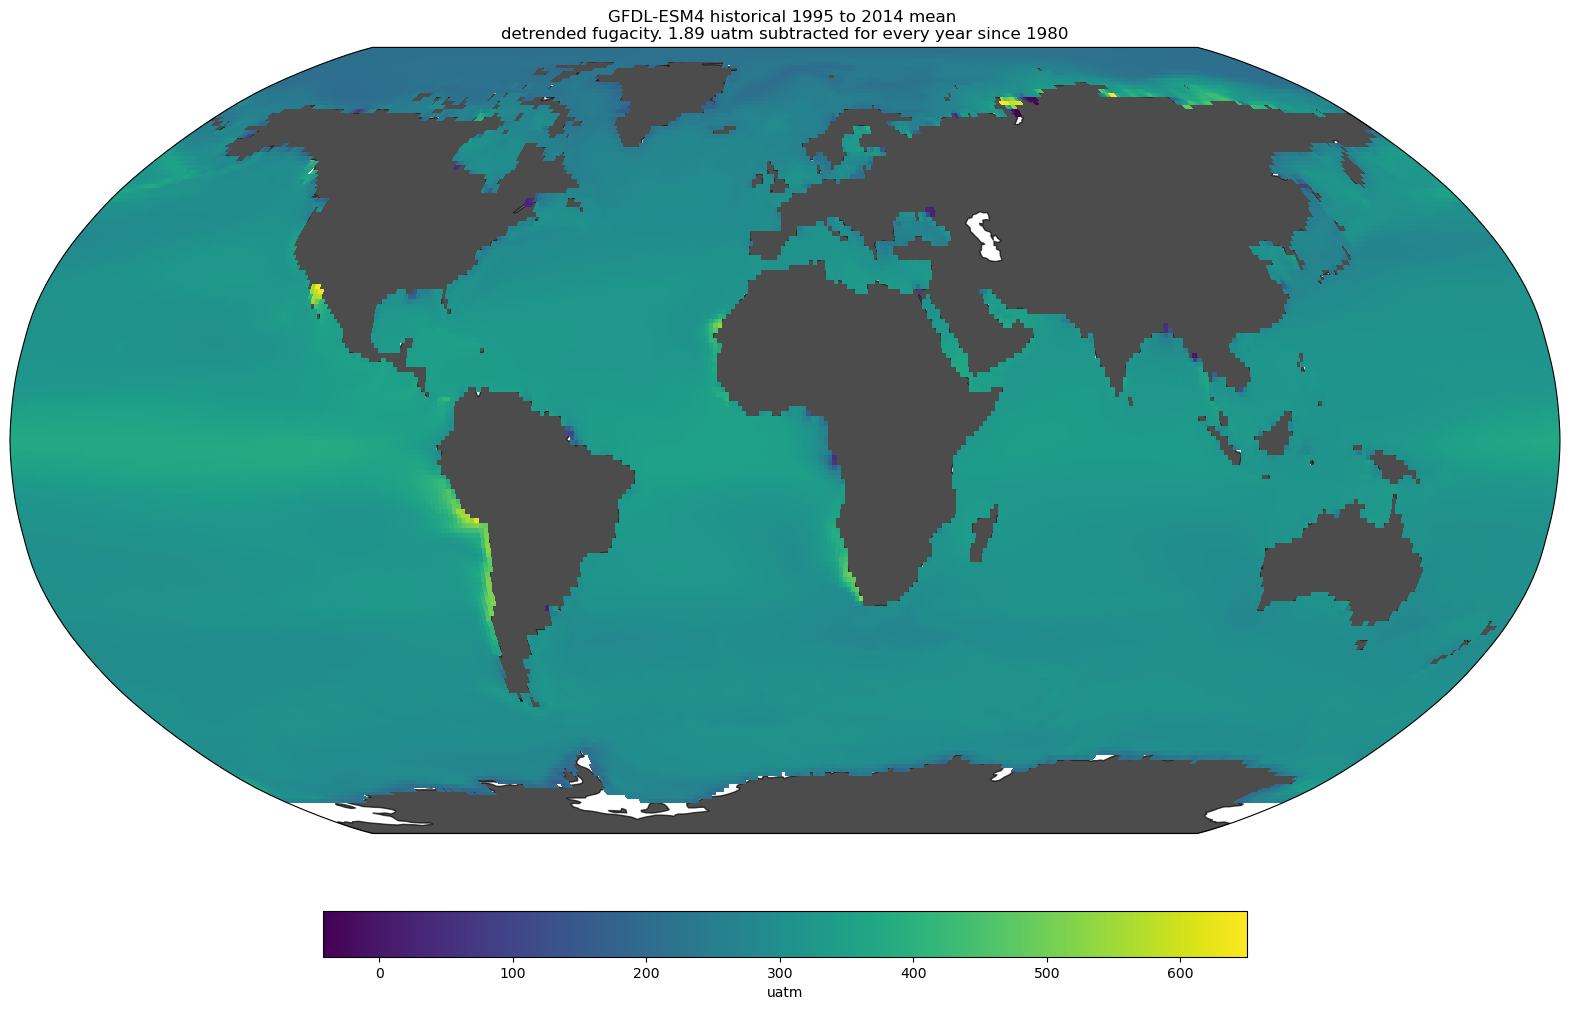

In [24]:
damean = da.mean('time', keep_attrs = True)

fig, ax = plt.subplots(figsize=[20,20], subplot_kw={'projection':ccrs.Robinson()})
im = ax.pcolormesh(damean.x,damean.y,damean['fugacity_detrended'],transform = ccrs.PlateCarree(), vmax = 650)
cbar = plt.colorbar(im,ax = ax, orientation='horizontal',fraction = 0.03, pad=0.05)
cbar.set_label(damean.fugacity.units)
ax.set_title('GFDL-ESM4 historical 1995 to 2014 mean \n' + damean.fugacity_detrended.description)
ax.add_feature(cfeature.LAND, color = 'black', alpha = 0.7)

/srv/conda/envs/notebook/lib/python3.10/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


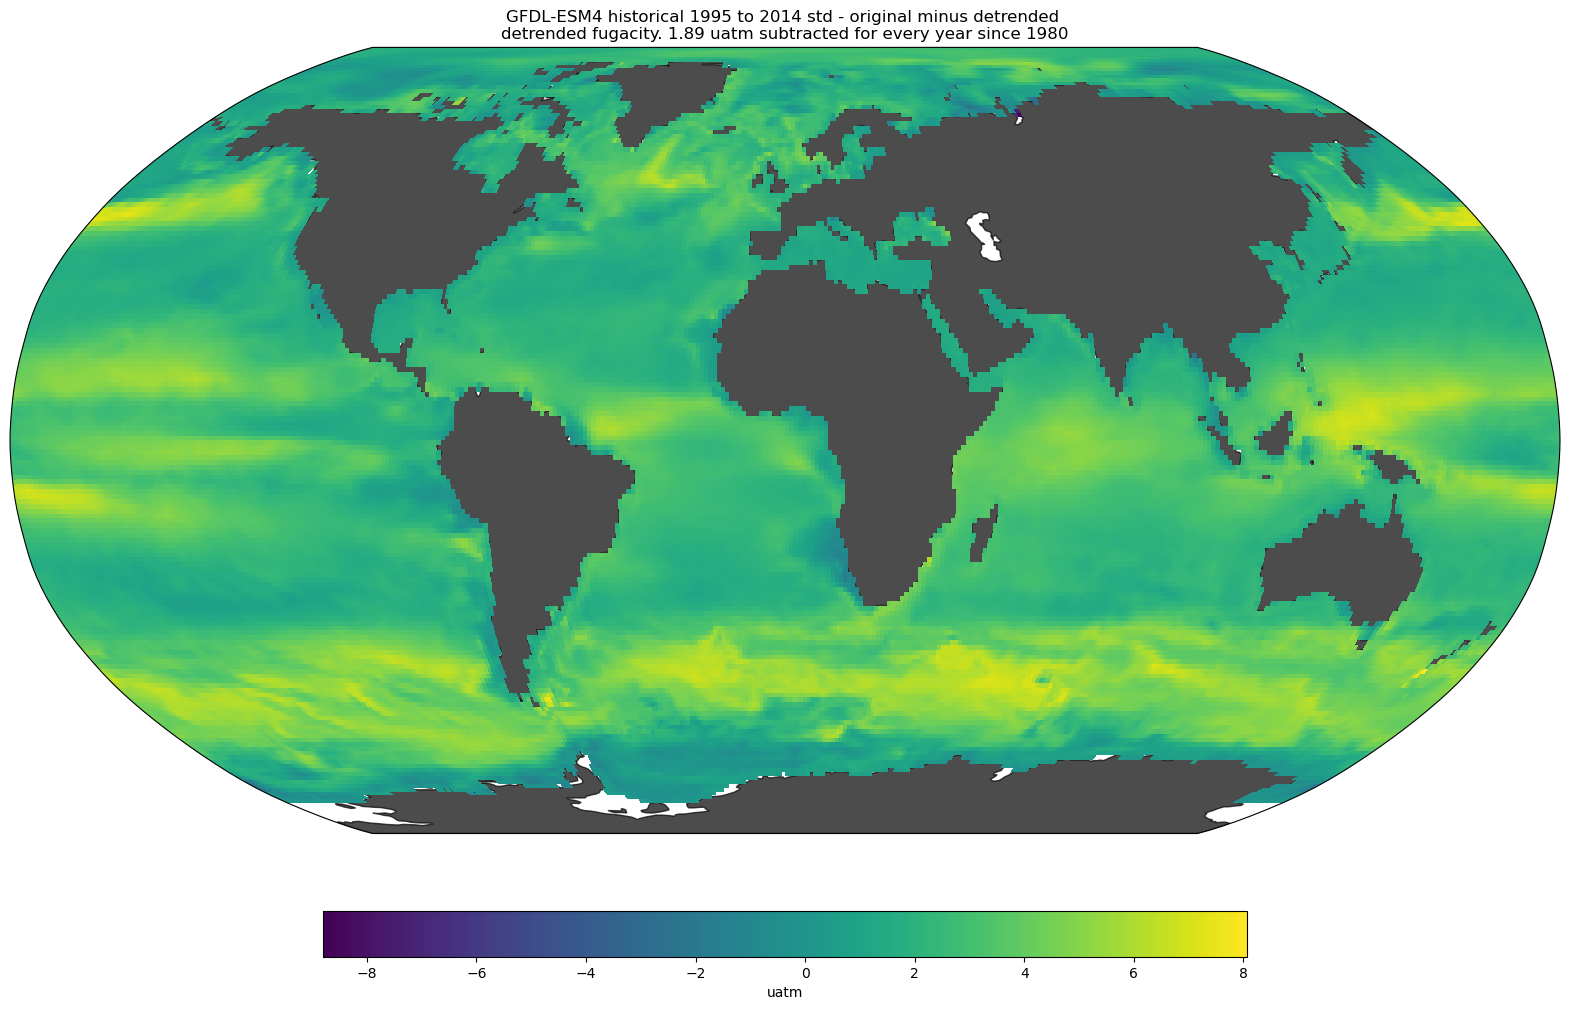

In [29]:
damean = da.std('time', keep_attrs = True)

fig, ax = plt.subplots(figsize=[20,20], subplot_kw={'projection':ccrs.Robinson()})
im = ax.pcolormesh(damean.x,damean.y,damean['fugacity'] - damean['fugacity_detrended'],transform = ccrs.PlateCarree())
cbar = plt.colorbar(im,ax = ax, orientation='horizontal',fraction = 0.03, pad=0.05)
cbar.set_label(damean.fugacity.units)
ax.set_title('GFDL-ESM4 historical 1995 to 2014 std - original minus detrended \n' + damean.fugacity_detrended.description)
ax.add_feature(cfeature.LAND, color = 'black', alpha = 0.7)

/srv/conda/envs/notebook/lib/python3.10/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


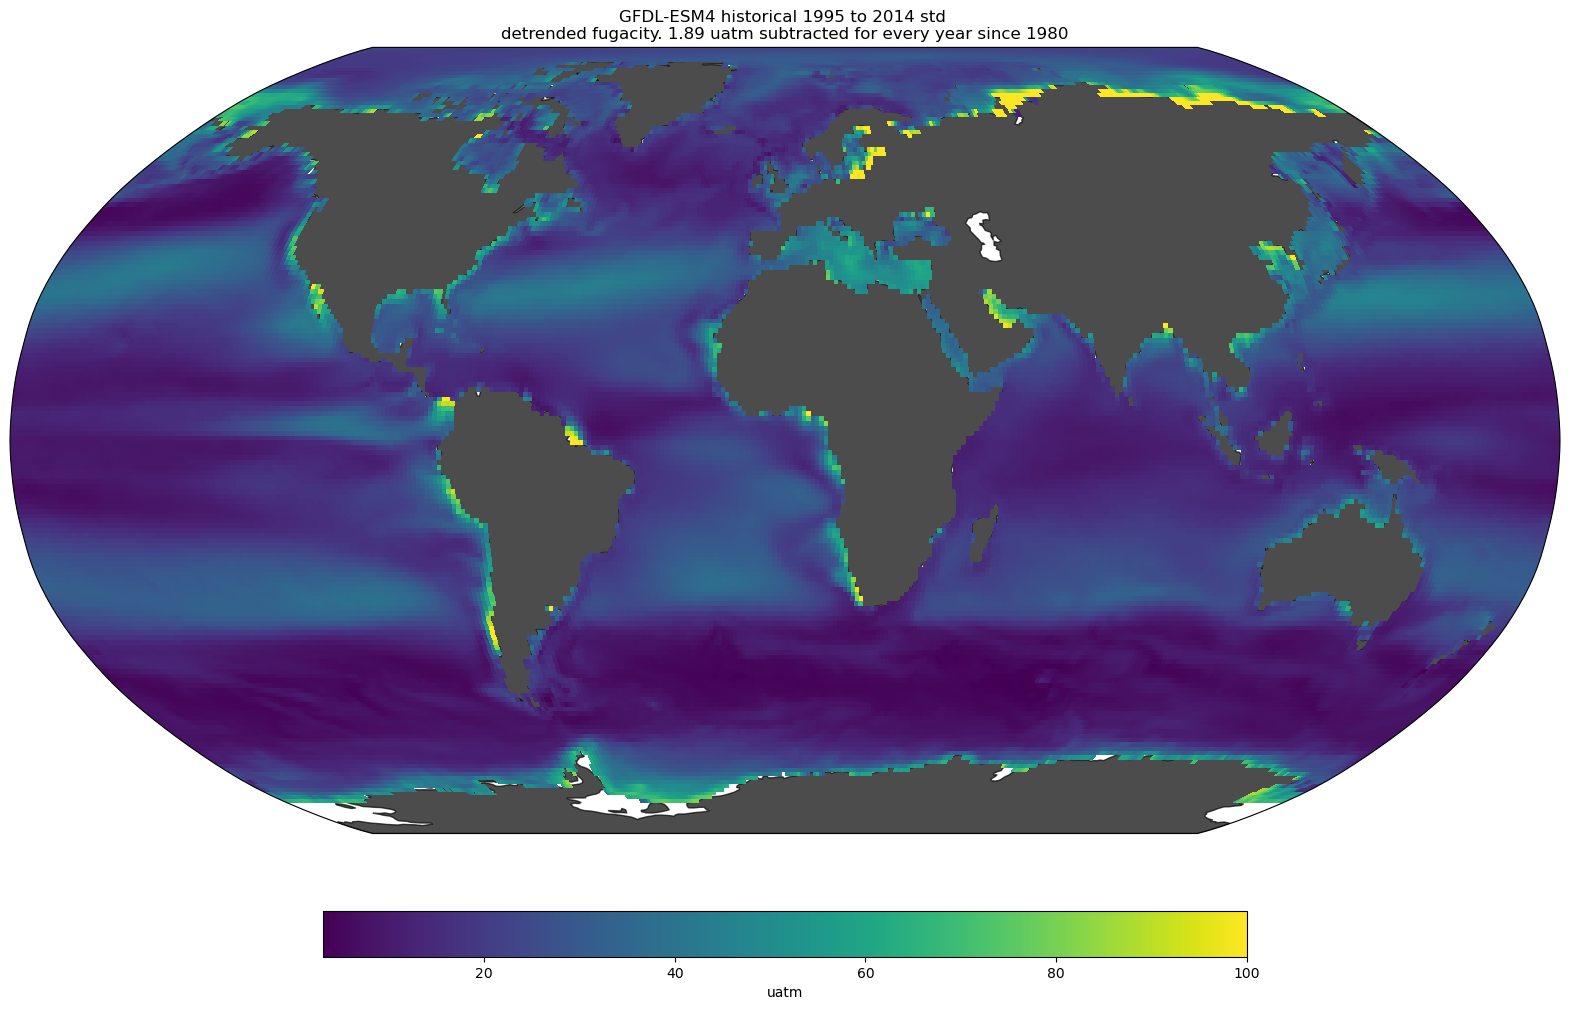

In [30]:
damean = da.std('time', keep_attrs = True)

fig, ax = plt.subplots(figsize=[20,20], subplot_kw={'projection':ccrs.Robinson()})
im = ax.pcolormesh(damean.x,damean.y,damean['fugacity_detrended'],transform = ccrs.PlateCarree(), vmax = 100)
cbar = plt.colorbar(im,ax = ax, orientation='horizontal',fraction = 0.03, pad=0.05)
cbar.set_label(damean.fugacity.units)
ax.set_title('GFDL-ESM4 historical 1995 to 2014 std \n' + damean.fugacity_detrended.description)
ax.add_feature(cfeature.LAND, color = 'black', alpha = 0.7)

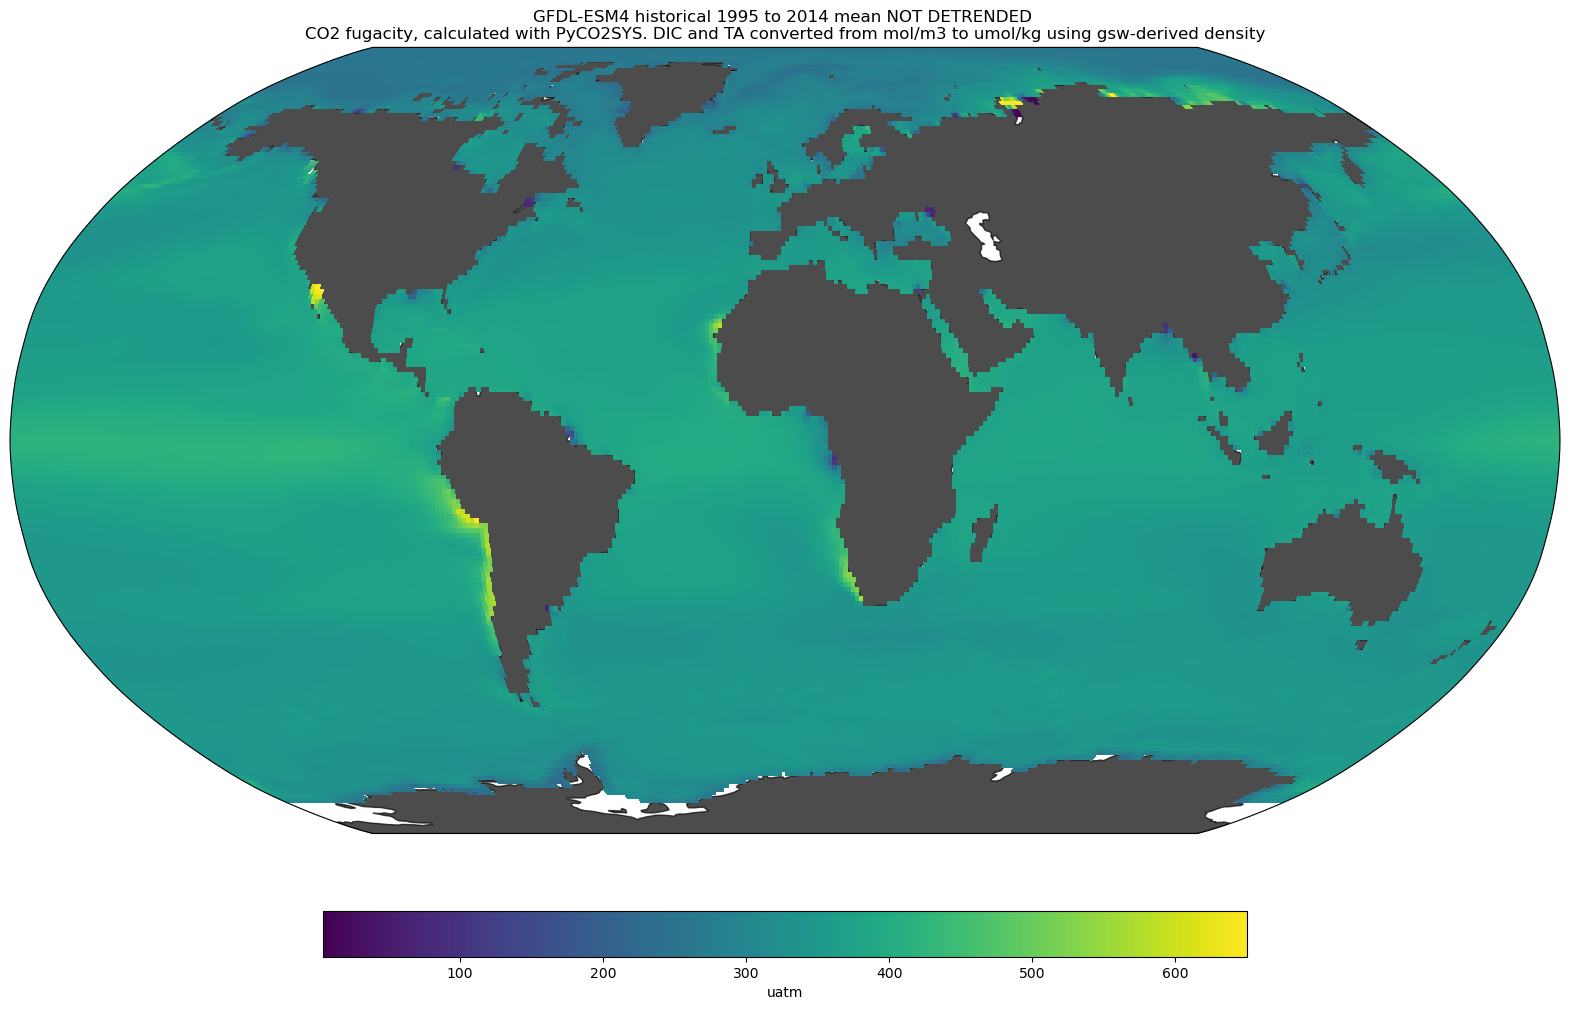

In [111]:
damean = da.mean('time', keep_attrs = True)

fig, ax = plt.subplots(figsize=[20,20], subplot_kw={'projection':ccrs.Robinson()})
im = ax.pcolormesh(damean.x,damean.y,damean['fugacity'],transform = ccrs.PlateCarree(), vmax = 650)
cbar = plt.colorbar(im,ax = ax, orientation='horizontal',fraction = 0.03, pad=0.05)
cbar.set_label(damean.fugacity.units)
ax.set_title('GFDL-ESM4 historical 1995 to 2014 mean NOT DETRENDED \n' + damean.fugacity.description)
ax.add_feature(cfeature.LAND, color = 'black', alpha = 0.7)

/srv/conda/envs/notebook/lib/python3.10/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


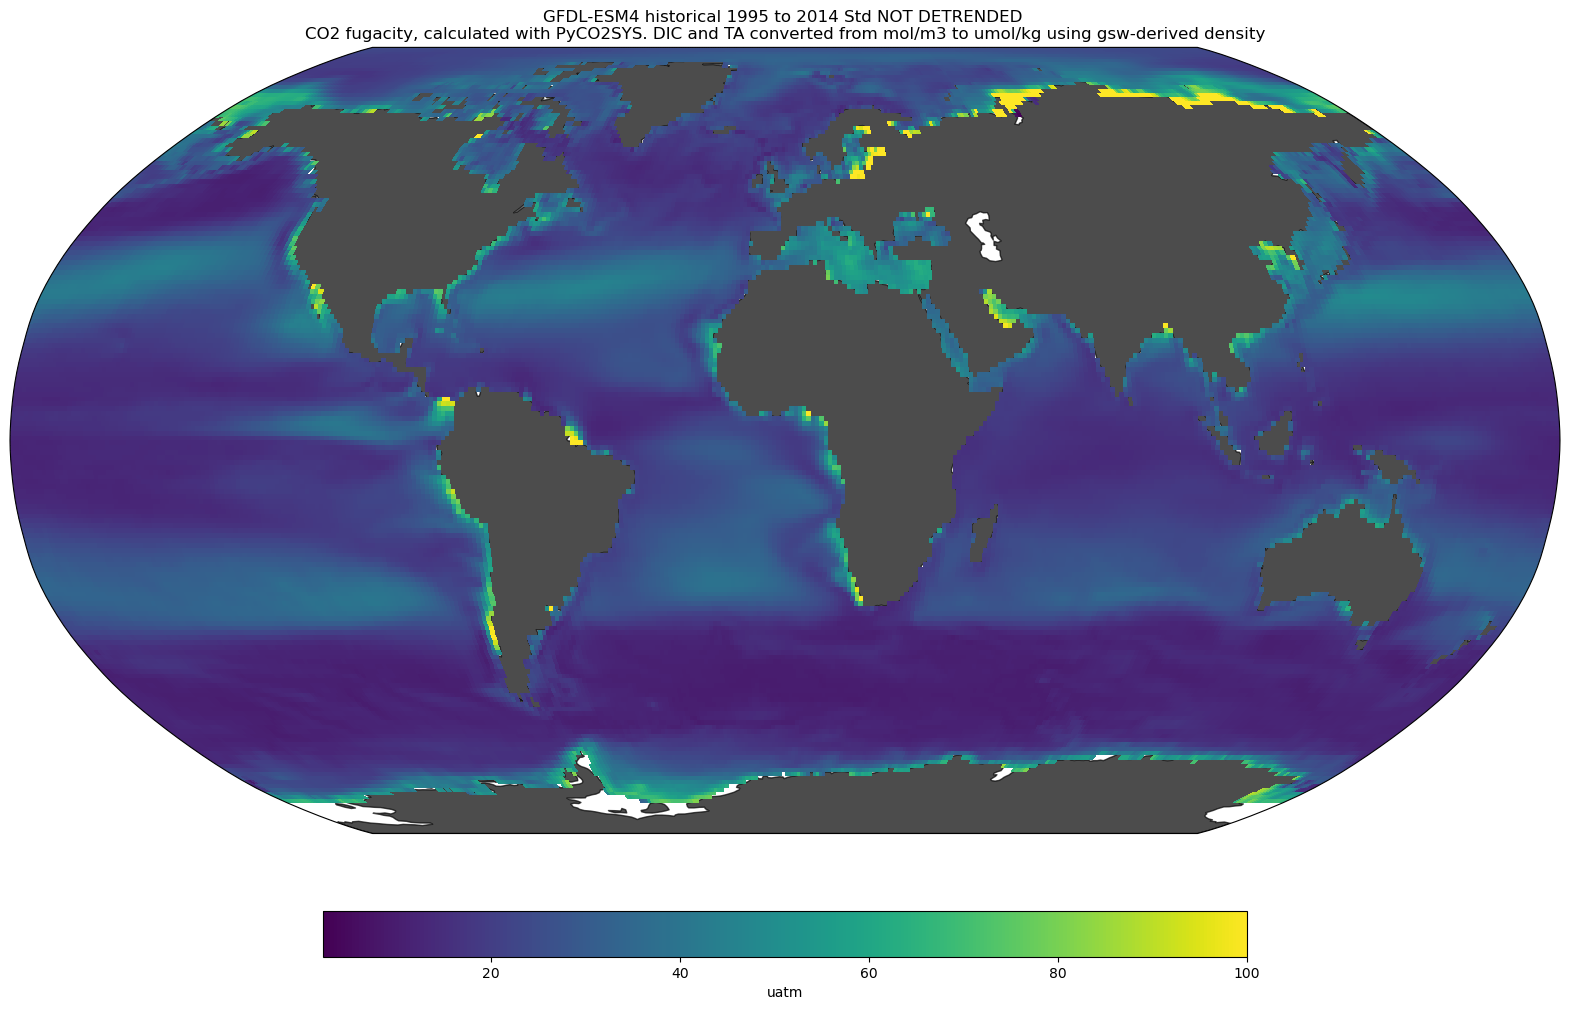

In [109]:
damean = da.std('time', keep_attrs = True)

fig, ax = plt.subplots(figsize=[20,20], subplot_kw={'projection':ccrs.Robinson()})
im = ax.pcolormesh(damean.x,damean.y,damean['fugacity'],transform = ccrs.PlateCarree(), vmax = 100)
cbar = plt.colorbar(im,ax = ax, orientation='horizontal',fraction = 0.03, pad=0.05)
cbar.set_label(damean.fugacity.units)
ax.set_title('GFDL-ESM4 historical 1995 to 2014 Std NOT DETRENDED \n' + damean.fugacity.description)
ax.add_feature(cfeature.LAND, color = 'black', alpha = 0.7)